#### ARCH 自回归条件异方差模型被用于刻画波动率的统计特征，波动率即条件方差。假设一组收益率数据满足某个均数方程，如AR：
    yt = a0 + a1yt-1 + epsilon_t
    则该组数据的波动率以残差项epsilon_t刻画。
    ARCH效应指时间序列的条件方差与过去p期的条件方差有关，而且随时间改变，该效应可以验证残差项为白噪声过程。

#### ARCH（p） 效应的检测过程如下。
    -对资产收益率序列｛y｝建立波动率模型一般需要下列5个步骤。
    
    -先检验收益率序列｛y｝是否是平稳的时间序列，并对根据其相关性建立合适的均值方程（比如ARMA 模型），描述收益率如何随时间演进。根据拟合的模型和实际值，可以得到残差序列epsilont。
    
    -对拟合的均值方程得到的残差序列进行 ARCH 效应检验，也就是检验收益率围绕着均值的偏差是否看起来时大时小，而并非几乎同样规模的偏差。检验序列是否具有 ARCH 效应有两种常用方法。
    （a）用Ljung-Box 检验残差平方序列的自相关性，即将序列的平方值作为波动率的代理变量，若残差序列有自相关性，则说明当期波动与过去期波动有关，初步判别序列有ARCH 效应。
    （b）用 Engle （1982）提出的 Lagrange Multiplier 检验（LM检验）。
        检验的原假设为：序列无ARCH 效应，即残差平方与往期值间没有线性关系。备择假设为序列具有ARCH 效应，即至少有一个该线性关系的系数显著不为0。
        
    -若第2步中 ARCH 效应在统计上显著，也就是收益率关于其均值的偏差也有动态变化，那么我们就需要再设定一个波动率模型试图刻画这种波动率的动态变化
    
    -对均值方程和波动率方程进行联合估计，也就是假设实际数据服从前面设定的均值方程和波动率方程后，计算出均值方程和波动率方程中的参数的估计值是多少，以及参数估计的误差是多少；
    
    -检验所拟合的模型，并在必要时进行改进。这一步非常重要，因为第4步中假定实际数据服从第1步设定的均值方程和第3步设定的波动率方程，然而这一假定并不一定合理。如果估计结果（特别是残差）不满足模型本身的假设，那么模型的可用性就很值得怀疑。所以我们需要在估计完参数后对模型的假设再进行检验。

#### ARCH（p） 模型的估计过程如下。
    -估计一个 ARCH模型，首先需要设定一个合适的阶数p。为确立 ARCH（p）模型中的阶数，在检验得知时间序列｛E｝确实存在显著的ARCH 效应的条件下，我们可以用的偏自相关函数（PACF）来确定p。
    
    -设定好阶数以后，为估计模型参数，我们常常假定wt服从以下三种分布中的一种来进行估计：标准正态分布、标准化的学生t分布和广义误差分布。然后用最大似然法（Maximum Likelihood）1对模型参数进行估计。
    
    -对模型进行参数估计以后，需要检验模型设定。最常见的检验依赖于以下事实：一个正确设定的ARCH是独立同分布的随机过程。因此标准化残差与其平方序列的Ljung-Box 统计量可以分别用来检验均值方程和波动率方程的正确性。

##### 下面，我们以上证指数为例来讲解如何判断是否具有 ARCH 效应。我们从上证指数2009年1月到2013年4月的日收益率序列的平方以及绝对值这两个序列的图形上来识别原序列是否具有 ARCH 效应。

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa import stattools
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_pacf as PACF
from arch import arch_model
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
SHret = pd.read_csv('sh.000001.csv', index_col='date')
SHret.index = pd.to_datetime(SHret.index)
SHret['ret'] = SHret['close'].pct_change()
SHret = SHret.iloc[1:,:]
SHret = SHret.drop(['Unnamed: 0','close'], axis=1)
SHret

,ret
date,
2009-01-06,0.030004
2009-01-07,-0.006780
2009-01-08,-0.023821
2009-01-09,0.014205
2009-01-12,-0.002370
...,...
2013-03-26,-0.012484
2013-03-27,0.001562
2013-03-28,-0.028227


<Axes: xlabel='date'>

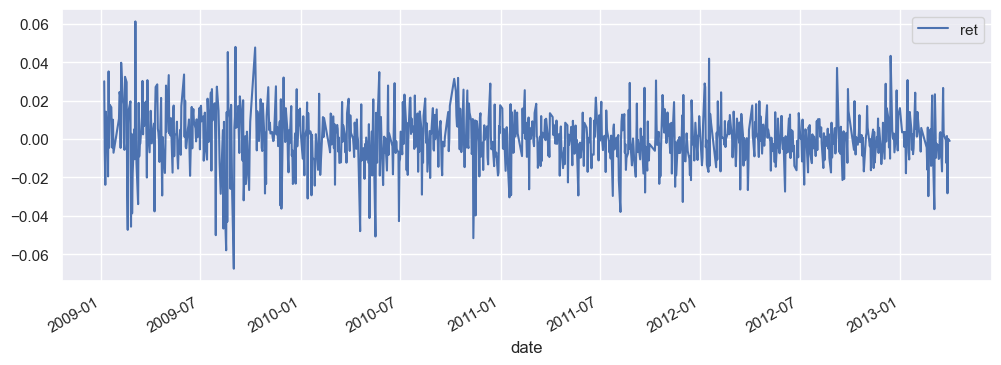

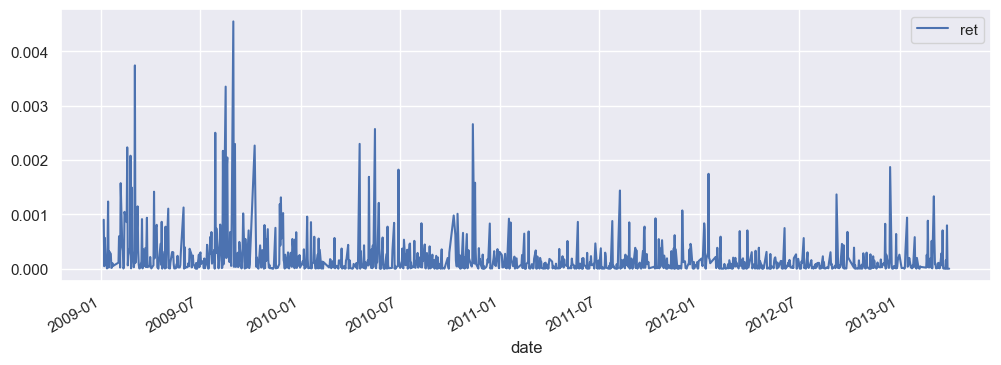

In [4]:
SHret.plot(figsize=(12,4))
SHretsq = SHret**2
SHretsq.plot(figsize=(12,4))

In [5]:
t = sm.tsa.stattools.adfuller(SHret)
print("p-value: ", t[1])

p-value:  0.0


##### 注意到，p值小于0.05，因此我们可以说明序列是平稳的。接下来，确定阶数。

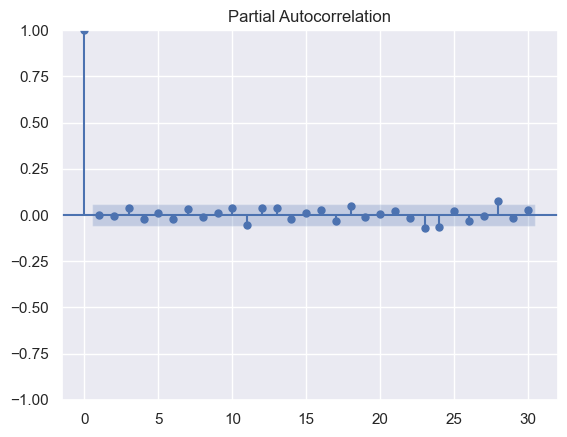

In [6]:
fig = PACF(SHret, lags=30)
plt.show()

##### 建立均值方程模型，此处使用AR。

AIC: -5703.240, HQIC: -5692.043, BIC: -5673.775
                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 1029
Model:             Restr. AutoReg(26)   Log Likelihood                2857.620
Method:               Conditional MLE   S.D. of innovations              0.014
Date:                Thu, 25 Jul 2024   AIC                          -5703.240
Time:                        14:51:05   BIC                          -5673.775
Sample:                            26   HQIC                         -5692.043
                                 1029                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        6.73e-05      0.000      0.152      0.879      -0.001       0.001
y.L1           0.0050      0.032      0.159      0.874      -0.057       0.067
y.L6

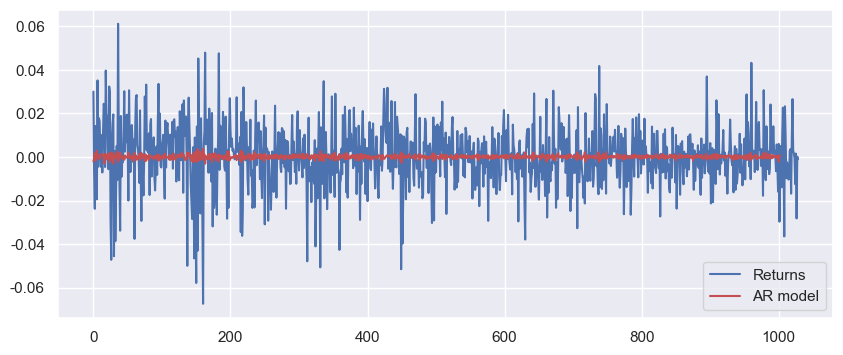

In [7]:
temp = np.array(SHret)
model = AutoReg(temp, lags=[1,6,25,26])
res = model.fit()

out = 'AIC: {0:0.3f}, HQIC: {1:0.3f}, BIC: {2:0.3f}'
print(out.format(res.aic, res.hqic, res.bic))
print(res.summary())
plt.rcParams['axes.unicode_minus'] = False #正常显示负号 
plt.figure(figsize=(10,4))
plt.plot(temp,'b',label='Returns')
plt.plot(res.fittedvalues, 'r',label='AR model')
plt.legend()

In [8]:
LjungBox = stattools.q_stat(stattools.acf(SHret**2)[1:13], len(SHret))
LjungBox[1][-1]

np.float64(6.754212691722764e-30)

##### 由于检验的p值明显小于0.05，所以可以拒绝上证指数收益率的平方序列是白噪声（无自相关）的原假设，即原序列（上证指数收益率序列）存在ARCH 效应。

##### GARCH 模型近似于ARMA的设定，认为时间序列每个时间点变量的波动率是最近p个时间点残差平方的线性组合，与最近q个时间点变量波动率的线性组合的合。

In [9]:
am = arch_model(SHret, rescale=False)

In [10]:
model = am.fit(update_freq=0,show_warning=False)
model.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: -2959.2144506294926
            Iterations: 8
            Function evaluations: 82
            Gradient evaluations: 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2959.21
Distribution:                  Normal   AIC:                          -5910.43
Method:            Maximum Likelihood   BIC:                          -5890.68
                                        No. Observations:                 1029
Date:                Thu, Jul 25 2024   Df Residuals:                     1028
Time:                        14:51:10   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -4.6113e-05  4.269e-04     -0.108      0.914 [-8.827e-04,7.905e-04]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      4.0470e-06  2.331e-14  1.736e+08      0.000 [4.047e-06,4.047e-06]
alpha[1]       0.0500  3.244e-04    154.137      0.000 [4.936e-02,5.064e-02]
beta[1]        0.9300  3.661e-03    254.018      0.000     [  0.923,  0.937]
============================================================================

Covariance estimator: robust
"""

##### 刻画残差及其平方

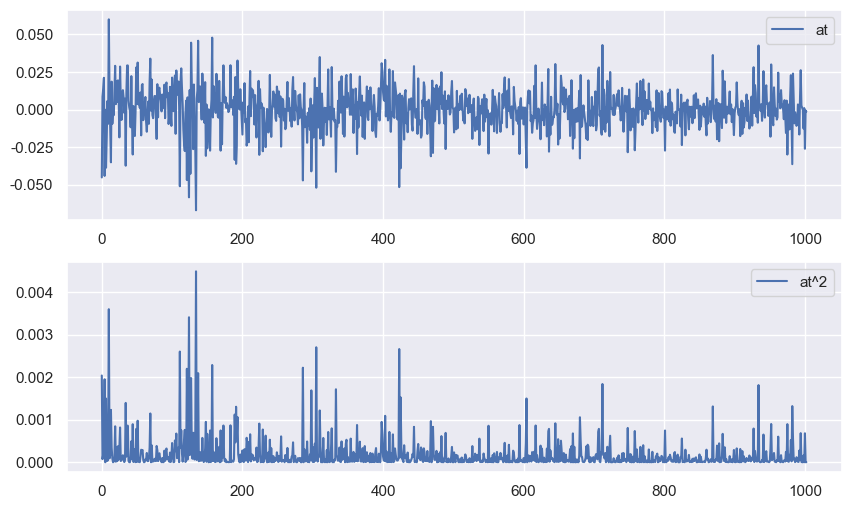

In [11]:
ret = SHret.values[26:].flatten()
at = np.subtract(ret, res.fittedvalues)
at.shape
at2 = np.square(at)
plt.figure(figsize=(10,6))
plt.subplot(211)
plt.plot(at,label = 'at')
plt.legend()
plt.subplot(212)
plt.plot(at2,label='at^2')
plt.legend(loc=0)

##### 对序列进行混成检验LjungBox。

In [12]:
m = 25
acf, q, p = sm.tsa.acf(at2,nlags=m,qstat=True)  
out = np.c_[range(1,26), acf[1:], q, p]
output=pd.DataFrame(out, columns=['lag', "AC", "Q", "P-value"])
output = output.set_index('lag')
output

,AC,Q,P-value
lag,,,
1.0,0.029067,0.849960,3.565635e-01
2.0,0.085047,8.133619,1.713196e-02
3.0,0.167247,36.329443,6.378622e-08
4.0,0.067946,40.987806,2.703500e-08
5.0,0.017397,41.293490,8.185172e-08
6.0,0.142322,61.772709,1.962607e-11
7.0,0.139971,81.601021,6.492481e-15
8.0,0.024127,82.190757,1.769303e-14
9.0,0.067455,86.805080,7.108598e-15


##### p-value小于显著性水平0.05，我们拒绝原假设，即认为序列具有相关性。因此具有ARCH效应。

##### 如上文所言，在检验得知时间序列确实存在显著的ARCH 效应的条件下，我们可以用残差平方的偏自相关函数（PACF）来确定p。

<Figure size 2000x500 with 0 Axes>

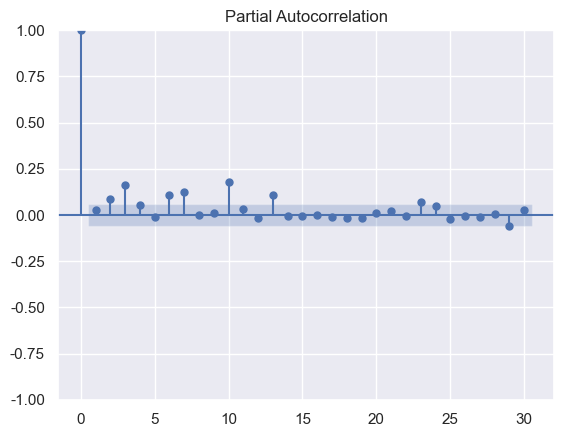

In [13]:
fig = plt.figure(figsize=(20,5))
fig = PACF(at2, lags = 30)

In [14]:
print(sm.tsa.arma_order_select_ic(at2,max_ar=10,max_ma=0,ic='aic')['aic_min_order'])

(np.int64(10), np.int64(0))


##### 注意到，lag=10时系数较为显著，往后出现拖尾现象，因此我们选定p=10来建立关于残差平方的AR(10)模型

In [15]:
am = arch_model(SHret.values, mean='AR',lags=26, vol='ARCH',p=10, rescale=False) #此处p=10对应残差平方AR模型
res = am.fit()
print(res.summary())

Iteration:      1,   Func. Count:     40,   Neg. LLF: 245776.00180406525
Iteration:      2,   Func. Count:     85,   Neg. LLF: 163166.84332907674
Iteration:      3,   Func. Count:    128,   Neg. LLF: 2252.4952237048315
Iteration:      4,   Func. Count:    171,   Neg. LLF: 92465316.78077339
Iteration:      5,   Func. Count:    217,   Neg. LLF: 3760.3061067643343
Iteration:      6,   Func. Count:    260,   Neg. LLF: 108625.72046100617
Iteration:      7,   Func. Count:    304,   Neg. LLF: 10415247.293142729
Iteration:      8,   Func. Count:    350,   Neg. LLF: 23825.864357304865
Iteration:      9,   Func. Count:    392,   Neg. LLF: 45.42476300582651
Iteration:     10,   Func. Count:    436,   Neg. LLF: 20526.026749573433
Iteration:     11,   Func. Count:    479,   Neg. LLF: 12815425.00972718
Iteration:     12,   Func. Count:    524,   Neg. LLF: -2906.289143522373
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2906.289142896301
            Iterat

In [16]:
res.params

Const        0.000062
y[1]        -0.000666
y[2]        -0.010603
y[3]         0.032089
y[4]        -0.040109
y[5]         0.008044
y[6]        -0.042498
y[7]         0.052432
y[8]        -0.030635
y[9]        -0.015565
y[10]        0.045497
y[11]       -0.019902
y[12]        0.021176
y[13]        0.018907
y[14]        0.011215
y[15]        0.002382
y[16]        0.035684
y[17]       -0.016035
y[18]        0.061026
y[19]       -0.014833
y[20]        0.019289
y[21]        0.024767
y[22]       -0.009958
y[23]       -0.081637
y[24]       -0.064710
y[25]        0.032180
y[26]       -0.001846
omega        0.000106
alpha[1]     0.044866
alpha[2]     0.044866
alpha[3]     0.044866
alpha[4]     0.044866
alpha[5]     0.044866
alpha[6]     0.044866
alpha[7]     0.047844
alpha[8]     0.044866
alpha[9]     0.044866
alpha[10]    0.044866
Name: params, dtype: float64

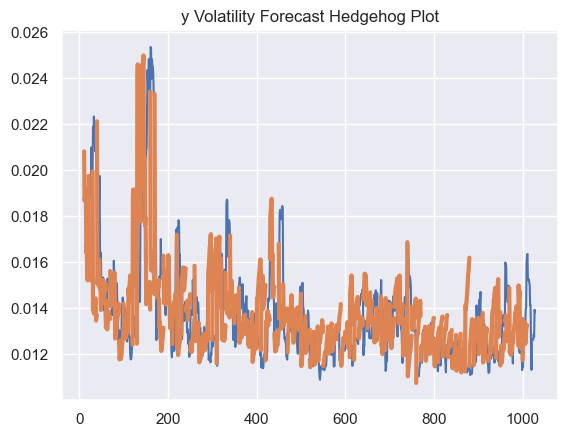

In [17]:
res.hedgehog_plot();

##### 虽然ARCH模型简单，但为了充分刻画收益率的波动率过程，往往需要很多参数，例如上面用到ARCH(10)模型，有时会有更高的ARCH(m)模型。因此，我们引入广义的ARCH模型（GARCH）。GARCH模型是一种用于建模金融时间序列数据中异方差性的统计模型。它是 ARCH模型的扩展，通过引入过去的方差（方差残差）的高阶项来更准确地描述时间序列数据中的方差结构。与之前的ARCH模型建立过程类似，不过GARCH(m,s)的定阶较难，一般使用低阶模型如GARCH(1,1),GARCH(2,1),GARCH(1,2)等。对于 GARCH(m,s) 模型，m表示 ARCH 部分的阶数，s 表示 GARCH 部分的阶数。一般使用ACF和PACF难以判断 因此我们使用信息准则来判断阶数。

In [18]:
a = int(len(SHret)*0.05)
train = SHret[:-a]
test = SHret[-a:]
train.head()

,ret
date,
2009-01-06,0.030004
2009-01-07,-0.006780
2009-01-08,-0.023821
2009-01-09,0.014205
2009-01-12,-0.002370


In [21]:
# 为避免冗杂测试信息，范围依据已经测试的结果做范围调整。
p_range = range(0, 3)  
q_range = range(0, 2)  

best_aic = np.inf
best_order = None
best_results = None

for p in p_range:
    for q in q_range:
        try:
            model = arch_model(SHret, vol='Garch', p=p, q=q, rescale=False)
            results = model.fit()
            
            aic = results.aic
            bic = results.bic
            
            if aic < best_aic:
                best_aic = aic
                best_order = (p, q)
                best_results = results
        except:
            continue

print("Best AIC:", best_aic)
print("Best order (p, q):", best_order)

Iteration:      1,   Func. Count:      5,   Neg. LLF: 12268743753.27896
Iteration:      2,   Func. Count:     15,   Neg. LLF: -2845.2190357184254
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2845.2190337945335
            Iterations: 6
            Function evaluations: 15
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 4274280591.4273887
Iteration:      2,   Func. Count:     18,   Neg. LLF: 237520024.12587768
Iteration:      3,   Func. Count:     30,   Neg. LLF: 6513641.129502524
Iteration:      4,   Func. Count:     41,   Neg. LLF: 289656.79833894165
Iteration:      5,   Func. Count:     53,   Neg. LLF: 281841.6739796869
Iteration:      6,   Func. Count:     64,   Neg. LLF: 794.1448144042705
Iteration:      7,   Func. Count:     74,   Neg. LLF: 148982.15429254758
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2959.2144506294926
            Iterations: 8
 

In [22]:
am = arch_model(train.values,mean='AR',lags=26,vol='GARCH',p=2, q=1, rescale=False) 
res = am.fit()
res.summary()

Iteration:      1,   Func. Count:     33,   Neg. LLF: 246826011.13896978
Iteration:      2,   Func. Count:     72,   Neg. LLF: 264597.0448512018
Iteration:      3,   Func. Count:    110,   Neg. LLF: 3103880431079892.5
Iteration:      4,   Func. Count:    148,   Neg. LLF: 1.1770557597131474e+18
Iteration:      5,   Func. Count:    187,   Neg. LLF: 236830.19828674447
Iteration:      6,   Func. Count:    225,   Neg. LLF: 5.427047253279977e+16
Iteration:      7,   Func. Count:    264,   Neg. LLF: 68858.06786020382
Iteration:      8,   Func. Count:    300,   Neg. LLF: 5.922521086493529e+18
Iteration:      9,   Func. Count:    339,   Neg. LLF: 256378649674.9583
Iteration:     10,   Func. Count:    380,   Neg. LLF: -2761.7702063403885
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2761.7702128079604
            Iterations: 14
            Function evaluations: 380
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:                      y   R-squared:                       0.033
Mean Model:                        AR   Adj. R-squared:                  0.005
Vol Model:                      GARCH   Log-Likelihood:                2761.77
Distribution:                  Normal   AIC:                          -5461.54
Method:            Maximum Likelihood   BIC:                          -5310.92
                                        No. Observations:                  952
Date:                Thu, Jul 25 2024   Df Residuals:                      925
Time:                        14:57:11   Df Model:                           27
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
Const      -7.4134e-05  3.792e-04     -0.195      0.845 [-8.174e-04,6.691e-04]
y[1]        6.4161e-03  3.296e-02      0.195      0.846 [-5.818e-02,7.101e-02]
y[2]        2.7645e-03  3.088e-02  8.953e-02      0.929 [-5.776e-02,6.329e-02]
y[3]            0.0117  3.253e-02      0.359      0.720 [-5.209e-02,7.543e-02]
y[4]           -0.0296  3.133e-02     -0.944      0.345 [-9.098e-02,3.184e-02]
y[5]            0.0169  3.100e-02      0.546      0.585 [-4.382e-02,7.768e-02]
y[6]           -0.0389  3.227e-02     -1.204      0.228    [ -0.102,2.438e-02]
y[7]            0.0430  3.226e-02      1.332      0.183   [-2.027e-02,  0.106]
y[8]           -0.0174  2.925e-02     -0.595      0.552 [-7.475e-02,3.991e-02]
y[9]       -6.1840e-03  3.205e-02     -0.193      0.847 [-6.899e-02,5.663e-02]
y[10]           0.0385  3.440e-02      1.120      0.263   [-2.891e-02,  0.106]
y[11]          -0.0472  3.101e-02     -1.523      0.128    [ -0.108,1.355e-02]
y[12]           0.0220  3.220e-02      0.682      0.495 [-4.116e-02,8.507e-02]
y[13]           0.0460  3.261e-02      1.409      0.159   [-1.797e-02,  0.110]
y[14]          -0.0198  3.169e-02     -0.624      0.532 [-8.191e-02,4.232e-02]
y[15]      -7.5181e-03  2.923e-02     -0.257      0.797 [-6.480e-02,4.976e-02]
y[16]           0.0370  3.183e-02      1.163      0.245 [-2.536e-02,9.939e-02]
y[17]          -0.0341  3.076e-02     -1.110      0.267 [-9.442e-02,2.615e-02]
y[18]           0.0325  3.010e-02      1.079      0.280 [-2.651e-02,9.147e-02]
y[19]       5.3058e-03  3.007e-02      0.176      0.860 [-5.363e-02,6.424e-02]
y[20]       6.0231e-03  3.209e-02      0.188      0.851 [-5.686e-02,6.891e-02]
y[21]           0.0257  2.942e-02      0.873      0.382 [-3.196e-02,8.335e-02]
y[22]          -0.0214  2.780e-02     -0.770      0.441 [-7.590e-02,3.307e-02]
y[23]          -0.0806  3.183e-02     -2.532  1.134e-02   [ -0.143,-1.821e-02]
y[24]          -0.0727  3.109e-02     -2.338  1.938e-02   [ -0.134,-1.176e-02]
y[25]           0.0240  3.020e-02      0.793      0.428 [-3.524e-02,8.316e-02]
y[26]          -0.0223  3.315e-02     -0.674      0.500 [-8.731e-02,4.262e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      4.4142e-06  8.058e-12  5.478e+05      0.000 [4.414e-06,4.414e-06]
alpha[1]       0.0250  7.936e-02      0.315      0.753     [ -0.131,  0.181]
alpha[2]       0.0250  7.517e-02      0.332      0.740     [ -0.122,  0.172]
beta[1]        0.9298  1.729e-02     53.780      0.000     [  0.896,  0.964]
============================================================================

Covariance estimato

In [23]:
res.params

Const      -0.000074
y[1]        0.006416
y[2]        0.002765
y[3]        0.011673
y[4]       -0.029574
y[5]        0.016930
y[6]       -0.038868
y[7]        0.042960
y[8]       -0.017417
y[9]       -0.006184
y[10]       0.038514
y[11]      -0.047228
y[12]       0.021954
y[13]       0.045950
y[14]      -0.019791
y[15]      -0.007518
y[16]       0.037014
y[17]      -0.034134
y[18]       0.032481
y[19]       0.005306
y[20]       0.006023
y[21]       0.025696
y[22]      -0.021412
y[23]      -0.080607
y[24]      -0.072698
y[25]       0.023961
y[26]      -0.022345
omega       0.000004
alpha[1]    0.024994
alpha[2]    0.024994
beta[1]     0.929767
Name: params, dtype: float64

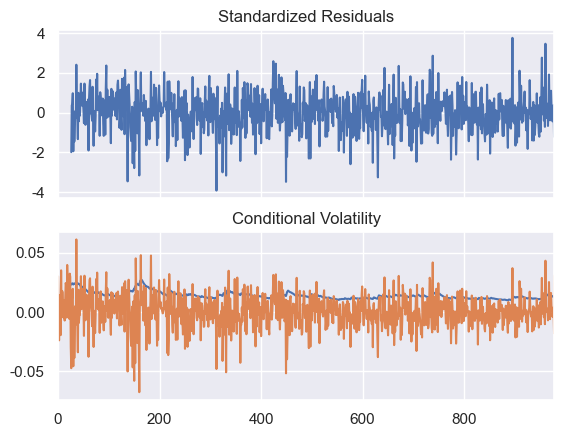

In [24]:
res.plot()
plt.plot(SHret.values)

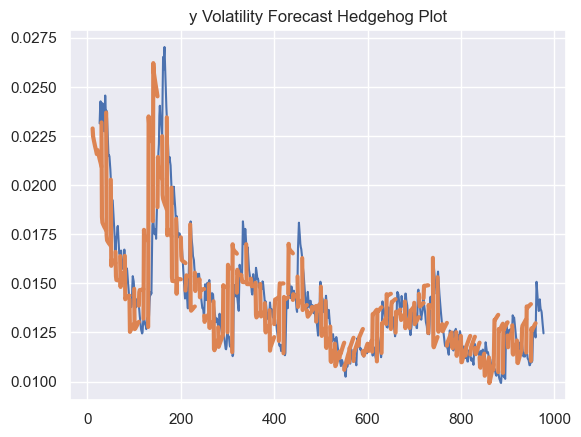

In [25]:
res.hedgehog_plot();

In [26]:
len(test)

51

In [27]:
ini = res.resid[-26:]
a = np.array(res.params[1:27])
w = a[::-1]

for i in range(len(test)):
    new = float(test.values[i]) - (res.params[0] + w.dot(ini[-26:]))
    ini = np.append(ini, new)

/var/folders/p6/gj8q9ssx4zbc886mfy50rg4h0000gn/T/ipykernel_25286/3688190884.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new = float(test.values[i]) - (res.params[0] + w.dot(ini[-26:]))


In [28]:
at_pre = ini[-len(test):]
at_pre2 = at_pre**2
at_pre2

array([1.00463636e-03, 6.44043358e-05, 8.38817900e-05, 1.25075897e-04,
       2.63318537e-04, 2.65164980e-05, 1.22419948e-07, 8.63954313e-07,
       5.12904380e-05, 1.37480829e-05, 4.94920822e-04, 2.81355412e-05,
       1.84620357e-04, 5.21399293e-09, 1.62004633e-04, 4.98880390e-05,
       1.44096307e-05, 4.10429458e-07, 3.18648341e-05, 2.55355434e-05,
       2.63750725e-05, 2.10988232e-04, 1.96703409e-05, 7.97876210e-04,
       4.14262890e-06, 1.04725323e-05, 2.26403663e-04, 7.90800862e-05,
       6.06039395e-04, 1.79949318e-05, 1.31198538e-03, 5.26757809e-04,
       4.57653780e-05, 3.25988061e-05, 3.16907367e-06, 1.12805527e-05,
       5.06512718e-05, 6.33783794e-05, 5.81229032e-06, 5.69653368e-05,
       2.96315951e-04, 2.30953537e-05, 9.07001691e-04, 1.48496328e-05,
       3.78991034e-06, 5.05146806e-07, 1.77440791e-04, 3.37576018e-06,
       6.66780927e-04, 6.02390009e-06, 2.84072741e-08])

In [29]:
ini2 = res.conditional_volatility[-1:]
for i in range(len(test)):
    if i >= 2:
        new = (res.params[-4] + 
               res.params[-3] * at_pre2[i-2] + 
               res.params[-2] * at_pre2[i-1] + 
               res.params[-1] * ini2[-1])
    elif i == 1:
        new = (res.params[-4] + 
               res.params[-3] * at_pre2[i-1] + 
               res.params[-1] * ini2[-1])
    else:
        new = (res.params[-4] + 
               res.params[-1] * ini2[-1])
    ini2 = np.append(ini2, new)
vol_pre = ini2[-len(test):]

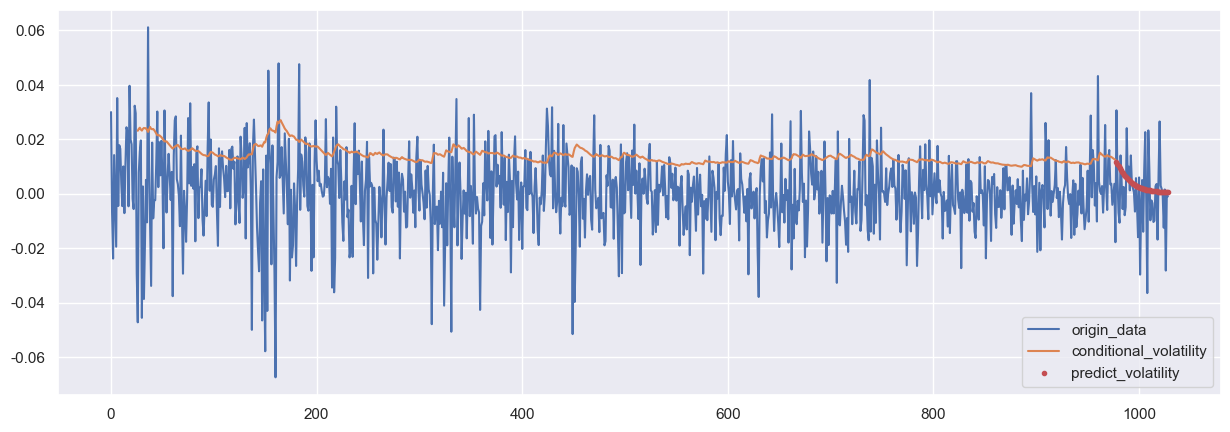

In [30]:
plt.figure(figsize=(15,5))
plt.plot(SHret.values,label='origin_data')
plt.plot(res.conditional_volatility,label='conditional_volatility')
x= range(978, 978+len(test))
plt.plot(x,vol_pre,'.r',label='predict_volatility')
plt.legend(loc=0)